## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
lr = 0.01
EPOCHS = 40
BATCH_SIZE = 256
MOMENTUM = [0.75, 0.85, 0.95]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mm in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Momentum with mm = %.6f" % (mm))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=mm)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "Momentum-%s" % str(mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Momentum with mm = 0.750000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [=============

50000/50000 [==============================] - 14s 282us/step - loss: 1.8883 - accuracy: 0.3263 - val_loss: 1.8145 - val_accuracy: 0.3474
Epoch 2/40
50000/50000 [==============================] - 12s 241us/step - loss: 1.6848 - accuracy: 0.4023 - val_loss: 1.9284 - val_accuracy: 0.3390
Epoch 3/40
50000/50000 [==============================] - 11s 218us/step - loss: 1.5983 - accuracy: 0.4385 - val_loss: 1.6111 - val_accuracy: 0.4195
Epoch 4/40
50000/50000 [==============================] - 11s 222us/step - loss: 1.5364 - accuracy: 0.4544 - val_loss: 1.6037 - val_accuracy: 0.4313
Epoch 5/40
50000/50000 [==============================] - 10s 207us/step - loss: 1.4844 - accuracy: 0.4761 - val_loss: 1.5725 - val_accuracy: 0.4439
Epoch 6/40
50000/50000 [==============================] - 11s 217us/step - loss: 1.4453 - accuracy: 0.4874 - val_loss: 1.5805 - val_accuracy: 0.4365
Epoch 7/40
50000/50000 [==============================] - 11s 226us/step - loss: 1.4084 - accuracy: 0.5007 - val_loss

50000/50000 [==============================] - 10s 204us/step - loss: 1.2935 - accuracy: 0.5396 - val_loss: 1.4059 - val_accuracy: 0.4987
Epoch 9/40
50000/50000 [==============================] - 10s 203us/step - loss: 1.2573 - accuracy: 0.5521 - val_loss: 1.4403 - val_accuracy: 0.4908
Epoch 10/40
50000/50000 [==============================] - 10s 199us/step - loss: 1.2309 - accuracy: 0.5625 - val_loss: 1.3440 - val_accuracy: 0.5298
Epoch 11/40
50000/50000 [==============================] - 10s 204us/step - loss: 1.2030 - accuracy: 0.5716 - val_loss: 1.4628 - val_accuracy: 0.4889
Epoch 12/40
50000/50000 [==============================] - 10s 204us/step - loss: 1.1741 - accuracy: 0.5830 - val_loss: 1.3621 - val_accuracy: 0.5135
Epoch 13/40
50000/50000 [==============================] - 11s 211us/step - loss: 1.1497 - accuracy: 0.5921 - val_loss: 1.3669 - val_accuracy: 0.5203
Epoch 14/40
50000/50000 [==============================] - 10s 209us/step - loss: 1.1276 - accuracy: 0.5983 - val

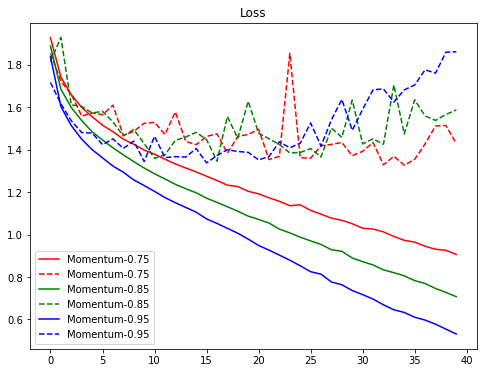

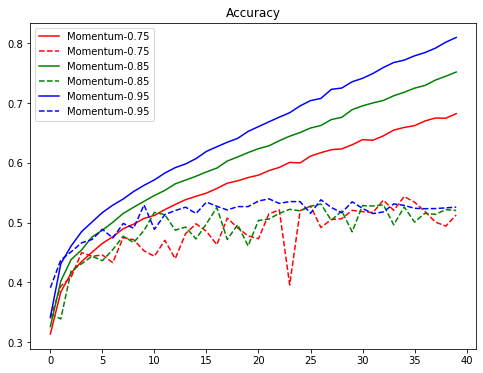

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()